
# This is monthly report analysis of the open government data. This session does data analysis on existing data and prediction

#### Technology used:
    -Jupyter Notebook
    -Python3 with numpy,pandas,matplotlib libraries

#### Analysis done:
    --Correlation betweeen griviences opened and disposed
    --Cumulative data analysis
    --Linear Regression
    --Post Prediction for one more year
    --Inferences

#### Revision history:
    Created date: 10-Dec-2019
    Created by: Rajaneesh Acharya
    Version History: V1.0

In [1]:
#import numpy and pandas package
import numpy as np
import pandas as pd

#import matplot lib for plotting and let the plotting be inline
%matplotlib inline
import matplotlib.pyplot as plt
#used for date formatting
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#used for creating linear regression, splitting train test data, training, encoding and getting learning confidence level
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split as ttsplit
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import LabelEncoder as le

#during report generation ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read all the records to MonthlyDeptdatafile. 
#Please note all the delimiter are "^" as delimiters of ";","&" etc will possibly be in comments
data=pd.read_csv("MonthlyDeptdatafile.csv", sep='^',parse_dates=[[1,2]])


In [3]:
#group the data by organization name in order to seggregate department/state performance. List out all department/ states

group_data=data.groupby('org_name')

for name,group in group_data:
   print(name, end=', ')
    #print(group)
    #plt.figure()
    #plt.plot(group['Recetpts'])
    #plt.show()
    

Central Board of Direct Taxes (Income Tax), Central Board of Indirect Taxes and Customs, Committee on Petitions Rajya Sabha, Department of Administrative Reforms and PG, Department of Agriculture Research and Education, Department of Agriculture, Cooperation and Farmers Welfare, Department of Animal Husbandry, Dairying, Department of Atomic Energy, Department of Bio Technology, Department of Chemicals and Petrochemicals, Department of Commerce, Department of Consumer Affairs, Department of Defence, Department of Defence Finance, Department of Defence Production, Department of Defence Research and Development, Department of Economic Affairs ACC Division, Department of Empowerment of Persons with Disabilities, Department of Ex Servicemen Welfare, Department of Expenditure, Department of Fertilizers, Department of Financial Services (Banking Division), Department of Financial Services (Insurance Division), Department of Financial Services (Pension Reforms), Department of Fisheries, Depart

# Statewise griviences filed and disposal analysis

### Type of analysis:
    Plot of griviences filed and disposed every month is plotted and correlation of 
    both of them is done. If there is a strong correlation between the rate at which 
    it is filed and disposed off, then it means the griviences are effectively handled.

### States:
    Government of Karnataka
    Government of Kerala
    Government of Tamil Nadu
    Government of Telangana
    Government of Andhra Pradesh
    
### Observations:

    Higher the positive correlation between the rate at which the griviences are filed 
    and disposed, better is the rate at which it is disposed off qualitatively
    
    

In [4]:
# Function to print state header in the report

def print_stateName_header(state):
    print(state+":")
    print("")

In [5]:
#Function to plot the statewise reciept and disposal of the griviences

def plot_graph(dept_dataframe):
    plt.rcParams['figure.figsize'] = [12, 4]
    fig, ax= plt.subplots(1,2)
    ax[0].plot(dept_dataframe.Year_Month, dept_dataframe.Recetpts)
    ax[1].plot(dept_dataframe.Year_Month, dept_dataframe.Disposals,'tab:red')
    ax[0].set_title('Recieved Grieviences')
    ax[1].set_title('Disposed Grieviences')
    ax[0].set_xlabel('time')
    ax[0].set_ylabel('number')
    ax[1].set_xlabel('time')
    ax[1].set_ylabel('number')
    ax[0].xaxis.set_major_locator(plt.MaxNLocator(4))
    ax[1].xaxis.set_major_locator(plt.MaxNLocator(4))
    _fmt = mdates.DateFormatter('%m/%Y')
    ax[0].xaxis.set_major_formatter(_fmt) 
    ax[1].xaxis.set_major_formatter(_fmt) 
    plt.show()

In [6]:
# function to compute correlation between reciept and dispposal of griviences

def print_correlation(dept_dataframe):
    print("Correlation matrix for the state "+state+" between grievences opened and griviences disposed")
    print("")
    print(np.corrcoef(dept_dataframe.Recetpts,dept_dataframe.Disposals))
    print("")

Government of Karnataka:



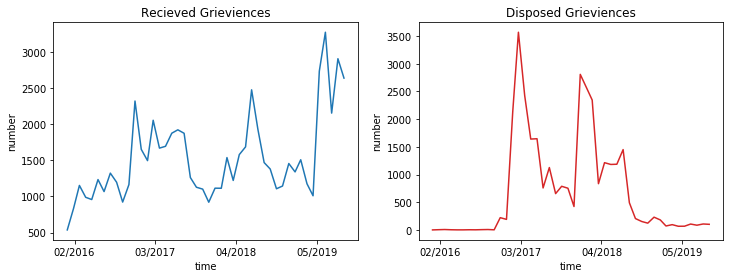

Correlation matrix for the state Government of Karnataka between grievences opened and griviences disposed

[[1.         0.10652106]
 [0.10652106 1.        ]]

Government of Kerala:



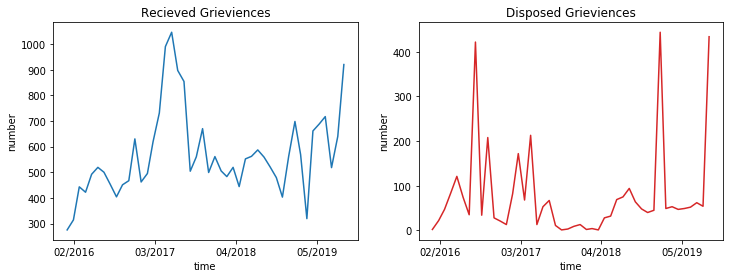

Correlation matrix for the state Government of Kerala between grievences opened and griviences disposed

[[1.        0.2747947]
 [0.2747947 1.       ]]

Government of Tamil Nadu:



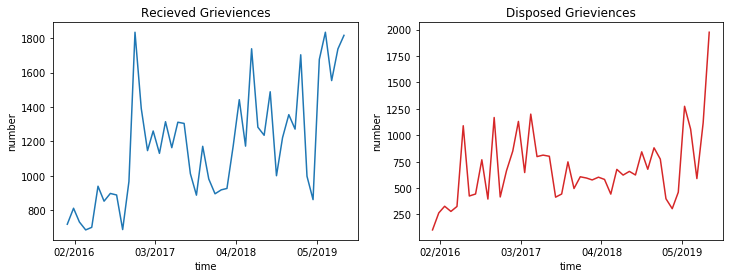

Correlation matrix for the state Government of Tamil Nadu between grievences opened and griviences disposed

[[1.         0.53354078]
 [0.53354078 1.        ]]

Government of Telangana:



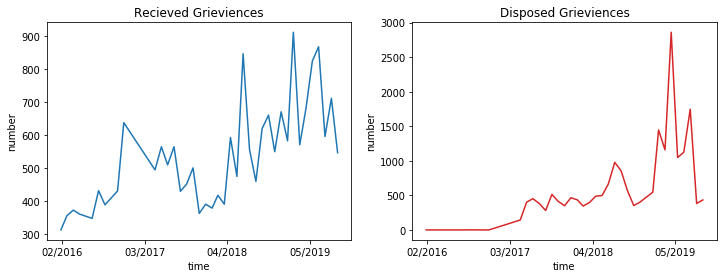

Correlation matrix for the state Government of Telangana between grievences opened and griviences disposed

[[1.         0.56222651]
 [0.56222651 1.        ]]

Government of Andhra Pradesh:



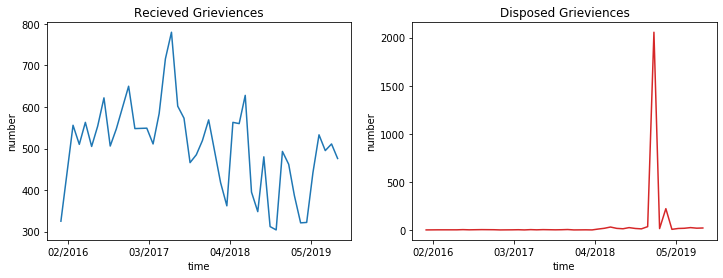

Correlation matrix for the state Government of Andhra Pradesh between grievences opened and griviences disposed

[[ 1.         -0.08937532]
 [-0.08937532  1.        ]]



In [7]:
# List out few state names. Prints the state header, plots the griviences recieved and disposed and computes the correlation


state_list = ['Government of Karnataka', 'Government of Kerala', 'Government of Tamil Nadu','Government of Telangana','Government of Andhra Pradesh']
for state in state_list:
    dept_dataframe=group_data.get_group(state)
    print_stateName_header(state)
    plot_graph(dept_dataframe)
    print_correlation(dept_dataframe)
    
    

### States:
    Government of Maharashtra
    Government of Gujarat
    Government of Rajasthan
    Government of Goa
   


Government of Maharashtra:



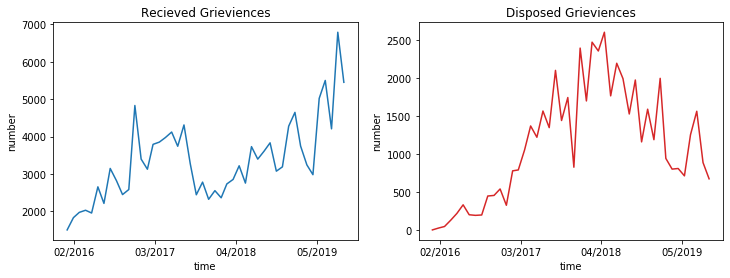

Correlation matrix for the state Government of Maharashtra between grievences opened and griviences disposed

[[1.         0.19776825]
 [0.19776825 1.        ]]

Government of Gujarat:



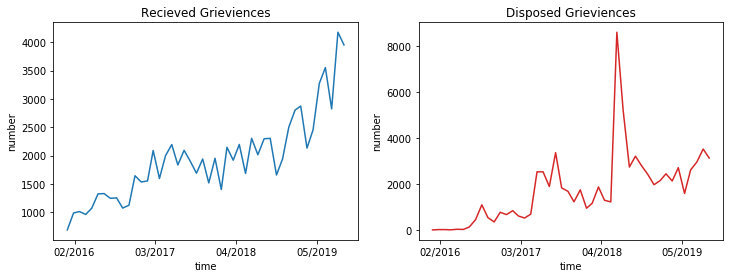

Correlation matrix for the state Government of Gujarat between grievences opened and griviences disposed

[[1.         0.55531996]
 [0.55531996 1.        ]]

Government of Rajasthan:



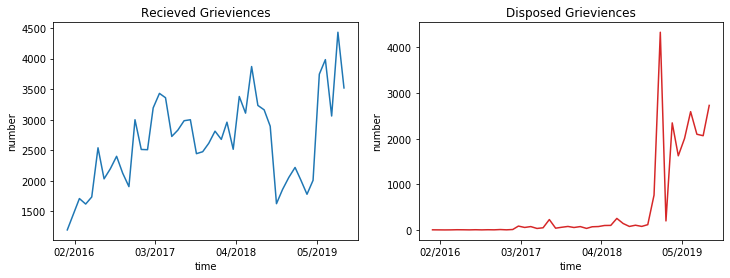

Correlation matrix for the state Government of Rajasthan between grievences opened and griviences disposed

[[1.         0.24413403]
 [0.24413403 1.        ]]

Government of Goa:



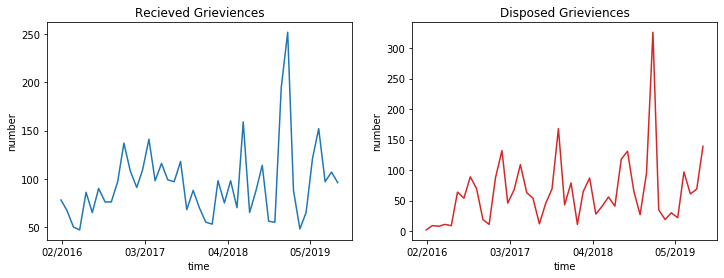

Correlation matrix for the state Government of Goa between grievences opened and griviences disposed

[[1.         0.58224956]
 [0.58224956 1.        ]]



In [8]:
# List out few state names. Prints the state header, plots the griviences recieved and disposed and computes the correlation

state_list = ['Government of Maharashtra', 'Government of Gujarat', 'Government of Rajasthan','Government of Goa']
for state in state_list:
    dept_dataframe=group_data.get_group(state)
    print_stateName_header(state)
    plot_graph(dept_dataframe)
    print_correlation(dept_dataframe)
    
    

### States:
    Government of Arunachal Pradesh
    Government of Assam
    Government of Sikkim
    Government of Tripura
    Government of Manipur
    Government of Meghalaya
    Government of Mizoram
    Government of Nagaland


Government of Arunachal Pradesh:



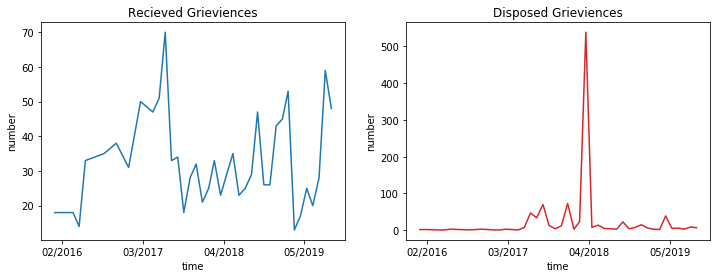

Correlation matrix for the state Government of Arunachal Pradesh between grievences opened and griviences disposed

[[ 1.         -0.09456577]
 [-0.09456577  1.        ]]

Government of Assam:



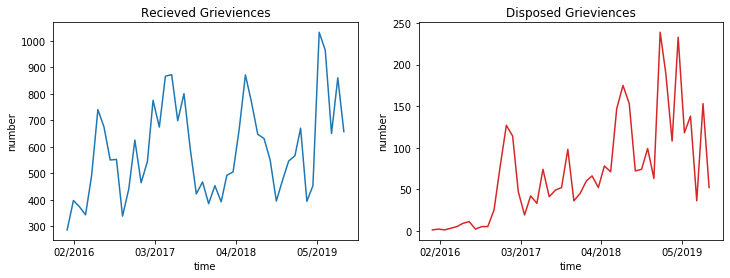

Correlation matrix for the state Government of Assam between grievences opened and griviences disposed

[[1.         0.24130722]
 [0.24130722 1.        ]]

Government of Sikkim:



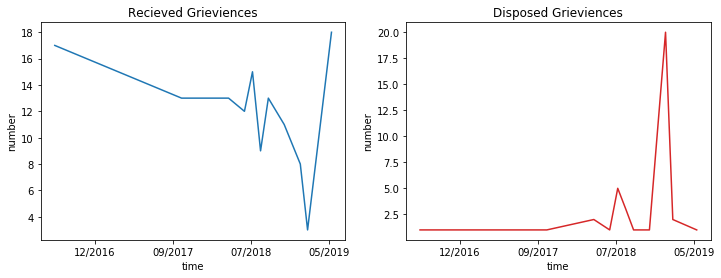

Correlation matrix for the state Government of Sikkim between grievences opened and griviences disposed

[[ 1.         -0.32667479]
 [-0.32667479  1.        ]]

Government of Tripura:



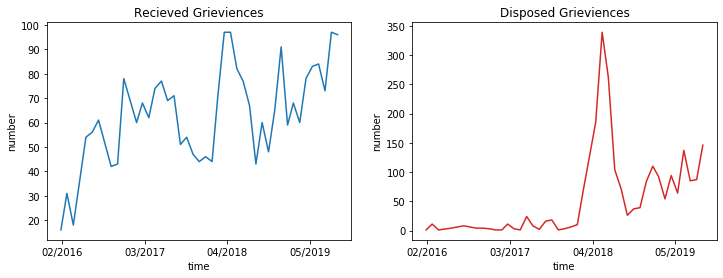

Correlation matrix for the state Government of Tripura between grievences opened and griviences disposed

[[1.         0.55718513]
 [0.55718513 1.        ]]

Government of Manipur:



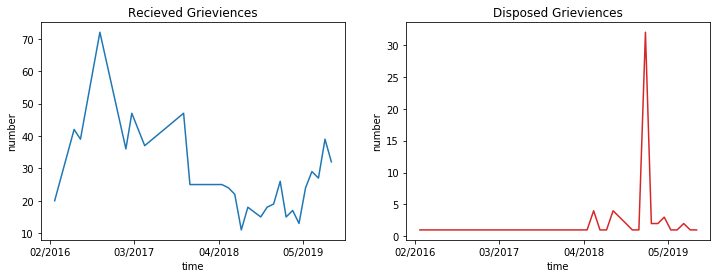

Correlation matrix for the state Government of Manipur between grievences opened and griviences disposed

[[ 1.         -0.09203866]
 [-0.09203866  1.        ]]

Government of Meghalaya:



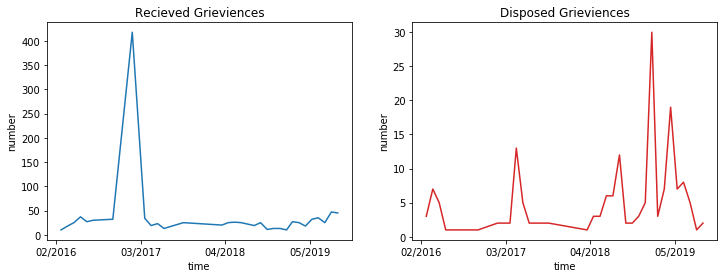

Correlation matrix for the state Government of Meghalaya between grievences opened and griviences disposed

[[ 1.         -0.14938861]
 [-0.14938861  1.        ]]

Government of Mizoram:



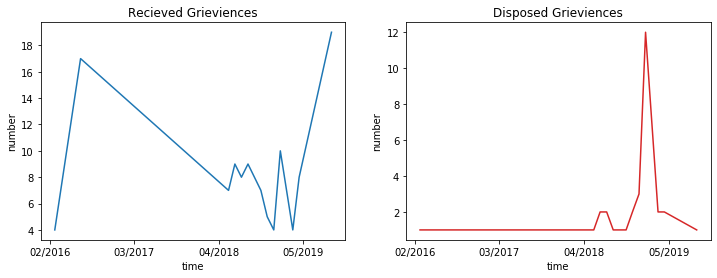

Correlation matrix for the state Government of Mizoram between grievences opened and griviences disposed

[[ 1.         -0.01017554]
 [-0.01017554  1.        ]]

Government of Nagaland:



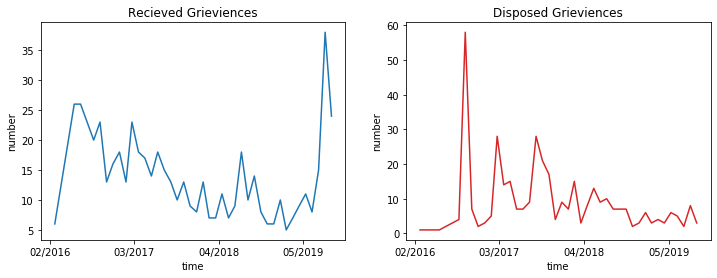

Correlation matrix for the state Government of Nagaland between grievences opened and griviences disposed

[[1.         0.20821784]
 [0.20821784 1.        ]]



In [9]:
# List out few state names. Prints the state header, plots the griviences recieved and disposed and computes the correlation


state_list = ['Government of Arunachal Pradesh', 'Government of Assam', 'Government of Sikkim','Government of Tripura',
             'Government of Manipur','Government of Meghalaya','Government of Mizoram','Government of Nagaland']
for state in state_list:
    dept_dataframe=group_data.get_group(state)
    print_stateName_header(state)
    plot_graph(dept_dataframe)
    print_correlation(dept_dataframe)
    
    

### States:
    Government of Haryana
    Government of Himachal Pradesh
    Government of Jammu and Kashmir
    Government of Punjab
    Government of Madhya Pradesh
    Government of Uttar Pradesh



Government of Haryana:



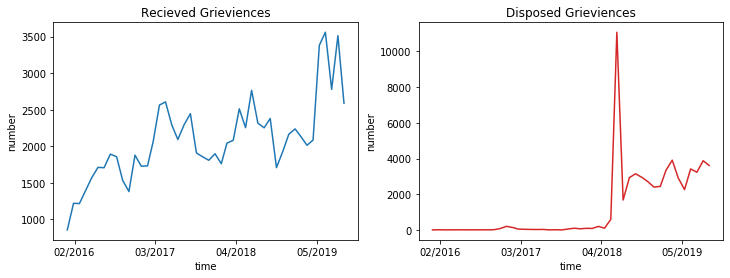

Correlation matrix for the state Government of Haryana between grievences opened and griviences disposed

[[1.         0.49274979]
 [0.49274979 1.        ]]

Government of Himachal Pradesh:



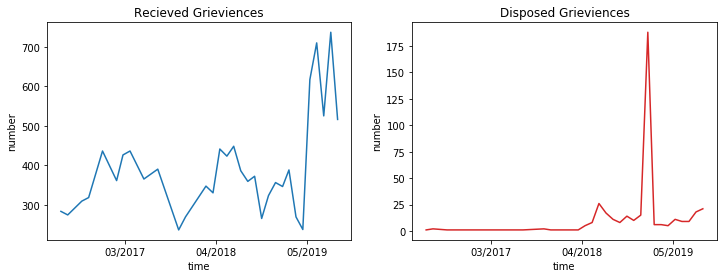

Correlation matrix for the state Government of Himachal Pradesh between grievences opened and griviences disposed

[[1.         0.02474831]
 [0.02474831 1.        ]]

Government of Jammu and Kashmir:



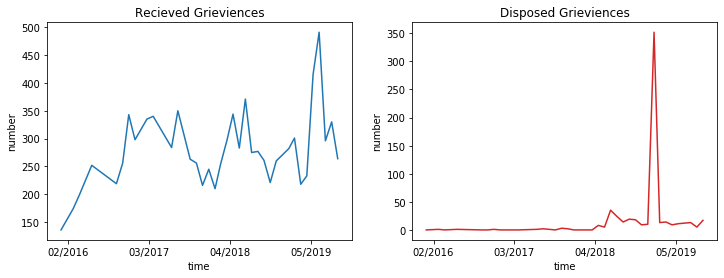

Correlation matrix for the state Government of Jammu and Kashmir between grievences opened and griviences disposed

[[1.         0.04557376]
 [0.04557376 1.        ]]

Government of Punjab:



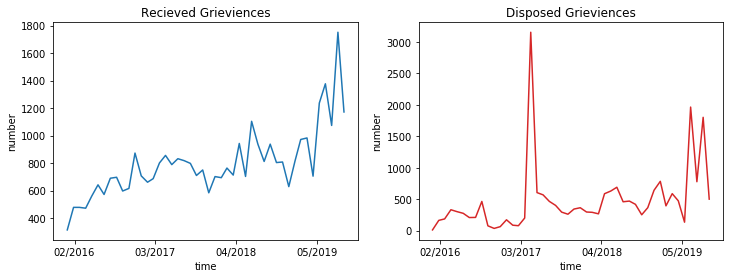

Correlation matrix for the state Government of Punjab between grievences opened and griviences disposed

[[1.         0.52638558]
 [0.52638558 1.        ]]

Government of Madhya Pradesh:



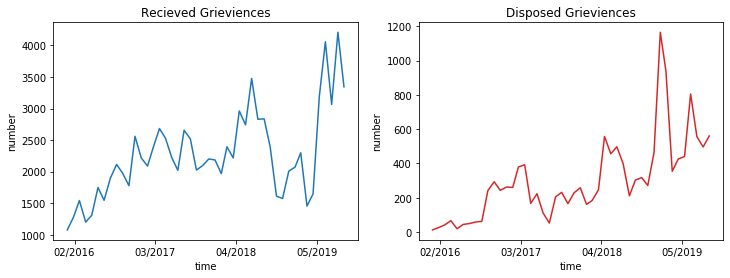

Correlation matrix for the state Government of Madhya Pradesh between grievences opened and griviences disposed

[[1.         0.51635086]
 [0.51635086 1.        ]]

Government of Uttar Pradesh:



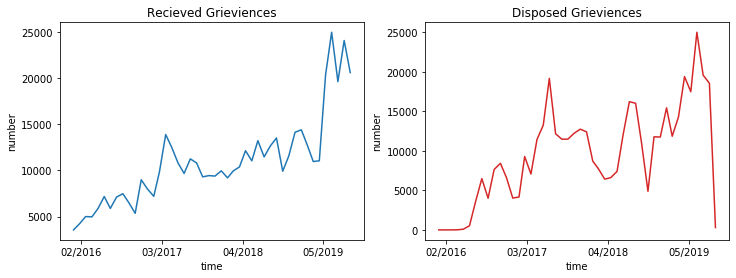

Correlation matrix for the state Government of Uttar Pradesh between grievences opened and griviences disposed

[[1.         0.66497473]
 [0.66497473 1.        ]]



In [10]:
# List out few state names. Prints the state header, plots the griviences recieved and disposed and computes the correlation

state_list = ['Government of Haryana', 'Government of Himachal Pradesh', 'Government of Jammu and Kashmir',
             'Government of Punjab','Government of Madhya Pradesh','Government of Uttar Pradesh']
for state in state_list:
    dept_dataframe=group_data.get_group(state)
    print_stateName_header(state)
    plot_graph(dept_dataframe)
    print_correlation(dept_dataframe)
    
    

### States:
    Government of West Bengal
    Government of Bihar
    Government of Chattisgarh
    Government of Jharkhand
    Government of Uttarakhand
    Government of Odisha


Government of West Bengal:



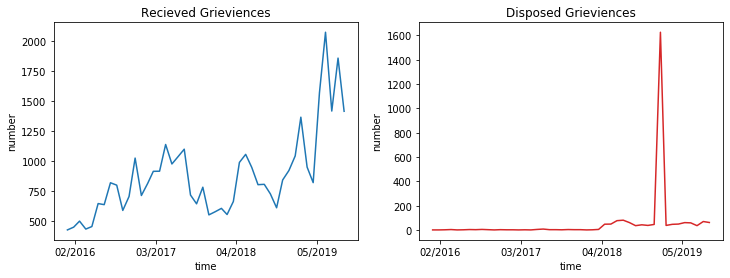

Correlation matrix for the state Government of West Bengal between grievences opened and griviences disposed

[[1.         0.13181984]
 [0.13181984 1.        ]]

Government of Bihar:



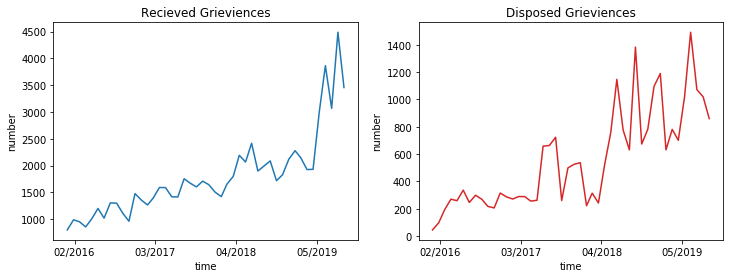

Correlation matrix for the state Government of Bihar between grievences opened and griviences disposed

[[1.        0.7885064]
 [0.7885064 1.       ]]

Government of Chattisgarh:



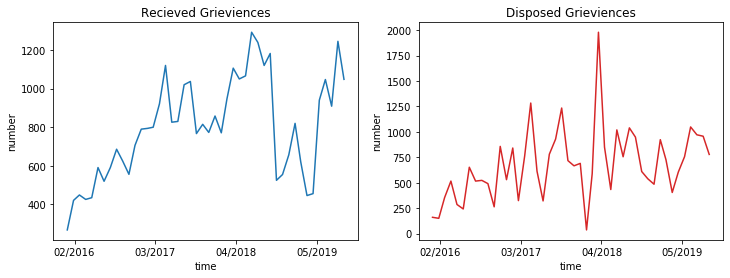

Correlation matrix for the state Government of Chattisgarh between grievences opened and griviences disposed

[[1.         0.63989292]
 [0.63989292 1.        ]]

Government of Jharkhand:



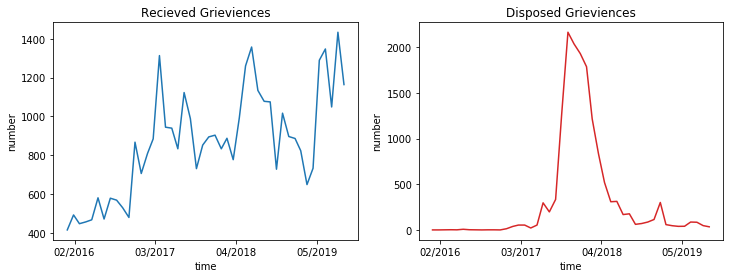

Correlation matrix for the state Government of Jharkhand between grievences opened and griviences disposed

[[1.         0.07052735]
 [0.07052735 1.        ]]

Government of Uttarakhand:



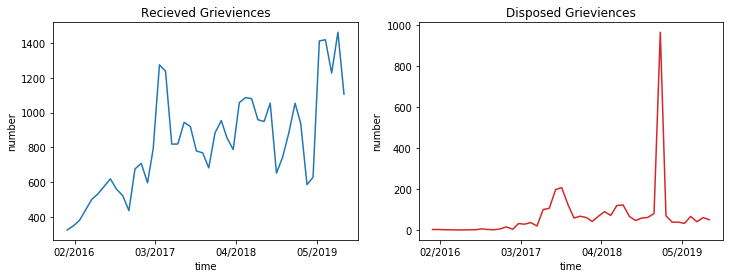

Correlation matrix for the state Government of Uttarakhand between grievences opened and griviences disposed

[[1.         0.22968546]
 [0.22968546 1.        ]]

Government of Odisha:



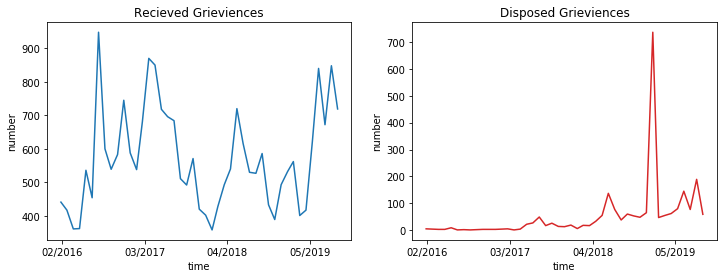

Correlation matrix for the state Government of Odisha between grievences opened and griviences disposed

[[1.         0.06578541]
 [0.06578541 1.        ]]



In [11]:
# List out few state names. Prints the state header, plots the griviences recieved and disposed and computes the correlation

state_list = ['Government of West Bengal', 'Government of Bihar', 'Government of Chattisgarh',
             'Government of Jharkhand','Government of Uttarakhand','Government of Odisha']
for state in state_list:
    dept_dataframe=group_data.get_group(state)
    print_stateName_header(state)
    plot_graph(dept_dataframe)
    print_correlation(dept_dataframe)
    
    

### States:
    Government of Puducherry
    Government of NCT of Delhi
    Government of Union Territory of Chandigarh
    Government of Union Territory of Dadra & Nagar Haveli
    Government of Union Territory of Daman & Diu
    Government of Union Territory of Lakshadweep
    Government of Andaman & Nicobar

Government of Puducherry:



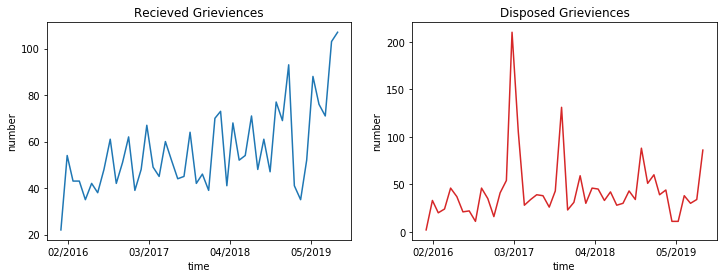

Correlation matrix for the state Government of Puducherry between grievences opened and griviences disposed

[[1.         0.19190075]
 [0.19190075 1.        ]]

Government of NCT of Delhi:



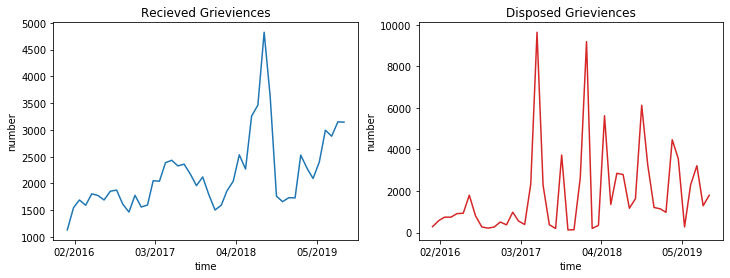

Correlation matrix for the state Government of NCT of Delhi between grievences opened and griviences disposed

[[1.         0.10949644]
 [0.10949644 1.        ]]

Government of Union Territory of Chandigarh:



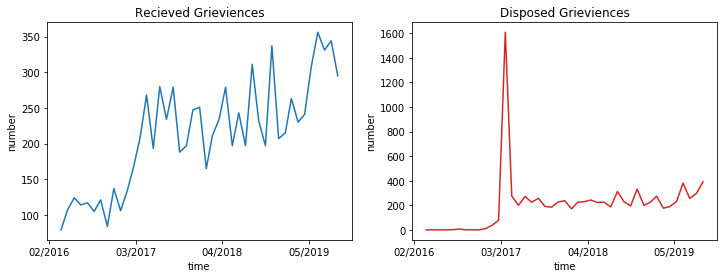

Correlation matrix for the state Government of Union Territory of Chandigarh between grievences opened and griviences disposed

[[1.        0.4250028]
 [0.4250028 1.       ]]

Government of Union Territory of Dadra & Nagar Haveli:



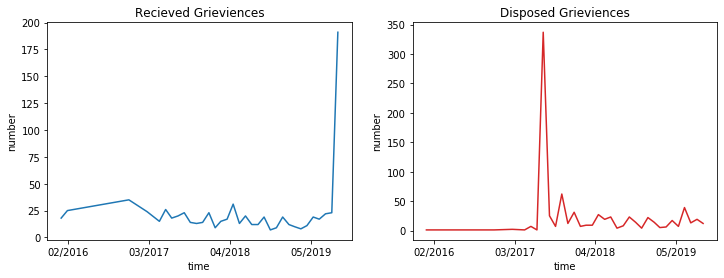

Correlation matrix for the state Government of Union Territory of Dadra & Nagar Haveli between grievences opened and griviences disposed

[[ 1.         -0.01740408]
 [-0.01740408  1.        ]]

Government of Union Territory of Daman & Diu:



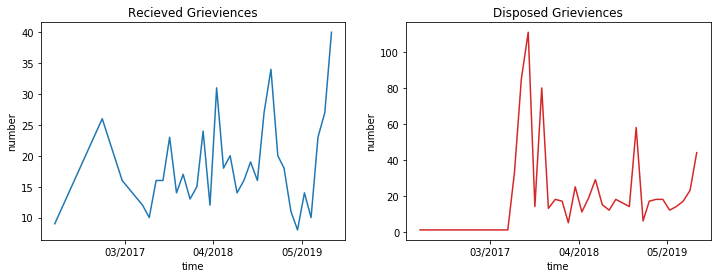

Correlation matrix for the state Government of Union Territory of Daman & Diu between grievences opened and griviences disposed

[[1.         0.07761288]
 [0.07761288 1.        ]]

Government of Union Territory of Lakshadweep:



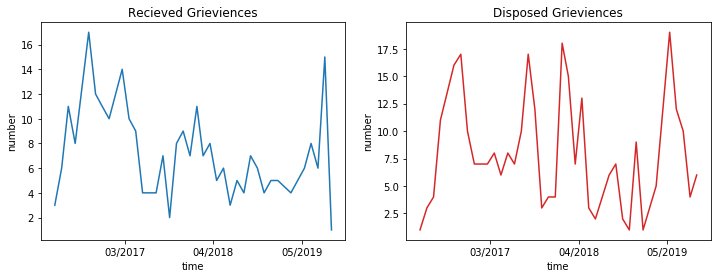

Correlation matrix for the state Government of Union Territory of Lakshadweep between grievences opened and griviences disposed

[[1.         0.28393081]
 [0.28393081 1.        ]]

Government of Andaman & Nicobar:



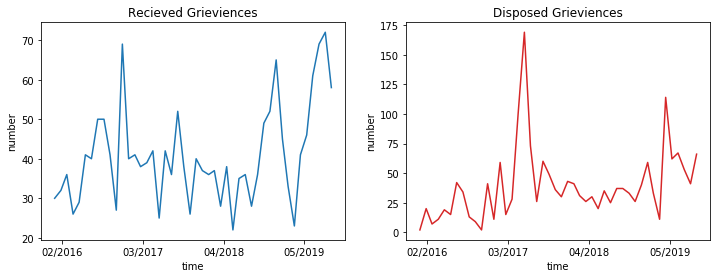

Correlation matrix for the state Government of Andaman & Nicobar between grievences opened and griviences disposed

[[1.         0.17012412]
 [0.17012412 1.        ]]



In [12]:
# List out few union territories names. Prints the  union territories header, plots the griviences recieved and disposed and computes the correlation

state_list = ['Government of Puducherry', 'Government of NCT of Delhi', 'Government of Union Territory of Chandigarh',
             'Government of Union Territory of Dadra & Nagar Haveli','Government of Union Territory of Daman & Diu','Government of Union Territory of Lakshadweep',
             'Government of Andaman & Nicobar']
for state in state_list:
    dept_dataframe=group_data.get_group(state)
    print_stateName_header(state)
    plot_graph(dept_dataframe)
    print_correlation(dept_dataframe)

# Statewise cumulative analysis for griviences filed and disposed

### Type of analysis:
    Cumulative plot of griviences filed and disposed from 2016 till 2019 October.
    Here trend using linear regression is also given.

### States:
    Government of Karnataka
    Government of Kerala
    Government of Tamil Nadu
    Government of Telangana
    Government of Andhra Pradesh
    
### Observations:
     More the gap of disposed and grieviences filed, lower is the rate of 
    addressing. It calls for improved productivity or having more man power to 
    address the grieviences or citizen connect of the government.
    
    
    

In [13]:
# Data preprocessing of the dataframe as prediction does not take date and change data from monthly to cumulative

def preprocess_Dataframe(dept_dataframe):
    encoder =le()
    dept_dataframe['new_date']=dept_dataframe.iloc[:,0]
    dept_dataframe.iloc[:,0]=encoder.fit_transform(dept_dataframe.iloc[:,0])
    dept_dataframe.iloc[:,2]=dept_dataframe.Recetpts.cumsum(skipna=True)
    dept_dataframe.iloc[:,3]=dept_dataframe.Disposals.cumsum(skipna=True)
    dept_dataframe.set_index('Year_Month')
    return dept_dataframe



In [14]:
# Train linear regression model

def create_model(dept_dataframe, train_test_size):
    date=dept_dataframe.iloc[:,[0]]
    output=dept_dataframe.iloc[:,[2,3]]
    traindata_input, testdata_input, traindata_output,  testdata_output=ttsplit(date,output,test_size=train_test_size)
    statewise_linearRegression=lr()
    statewise_linearRegression.fit(traindata_input, traindata_output)
    return [statewise_linearRegression, testdata_input, testdata_output]

In [15]:
# Predict for future date using model

def predict_tickets(start_Month, end_Month, increment):
    year_month_range=np.arange(start_Month, start_Month+end_Month, increment)
    futurepredict_input=pd.DataFrame({'Year_Month':year_month_range})
    future_preddata_output=statewise_linearRegression.predict(futurepredict_input)
    return future_preddata_output

In [16]:
# Plot the as is cumulative data in continuous line and predicted data in dash line

def plot_graph(dept_dataframe, future_daterange,future_preddata_output):
    plt.plot(dept_dataframe.new_date, dept_dataframe.iloc[:,[2,3]])
    plt.gca().set_prop_cycle(None)
    plt.plot(future_daterange,future_preddata_output,'--')
    plt.show()

In [17]:
#Print state header

def print_header(state, testdata_output, preddata_output):
    print(state+":")
    print("")
    print("Learning Confidence = "+str(r2(testdata_output, preddata_output)))
    print("")

Government of Karnataka:

Learning Confidence = 0.9477059583366199



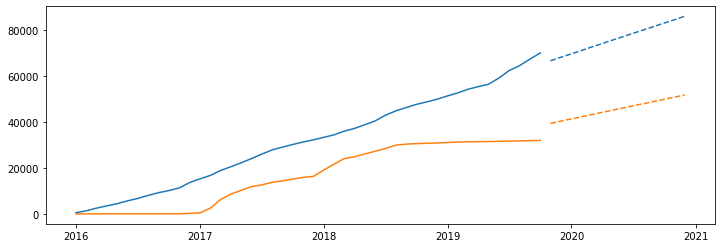

Government of Kerala:

Learning Confidence = 0.9842679189294918



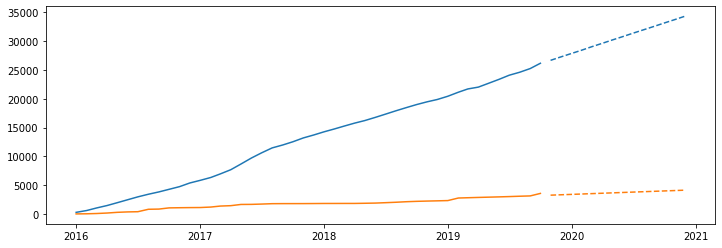

Government of Tamil Nadu:

Learning Confidence = 0.994889351931528



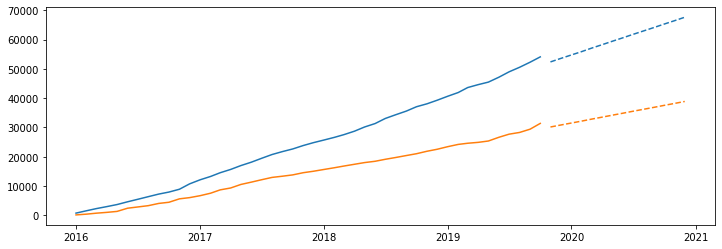

Government of Telangana:

Learning Confidence = 0.6702657054649572



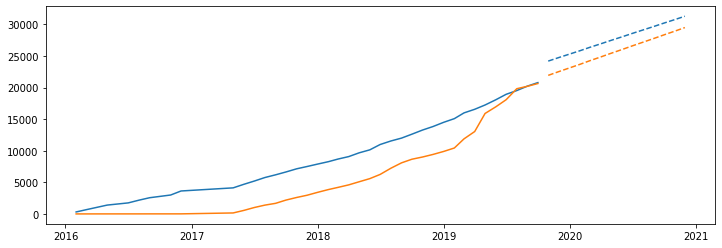

Government of Andhra Pradesh:

Learning Confidence = -96.02167528316696



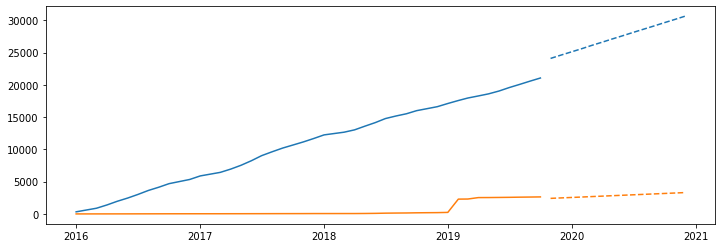

In [18]:
#takes the list of states and iterates through each of the state and prints the header, creates a linear regression model
# trains he model and uses the trained model to predict. Finally plots the data

state_list = ['Government of Karnataka', 'Government of Kerala', 'Government of Tamil Nadu','Government of Telangana','Government of Andhra Pradesh']
for state in state_list:
    dept_dataframe=group_data.get_group(state)
    dept_dataframe=preprocess_Dataframe(dept_dataframe)
    ret = create_model(dept_dataframe, 0.25)
    statewise_linearRegression=ret[0]
    testdata_input=ret[1]
    testdata_output=ret[2]
    preddata_output=statewise_linearRegression.predict(testdata_input)
    print_header(state, testdata_output, preddata_output)
    future_preddata_output=predict_tickets(46, 14, 1)
    future_daterange=pd.date_range('2019/10/01', periods = 14, freq = 'M')
    plot_graph(dept_dataframe, future_daterange,future_preddata_output)

Government of Maharashtra:

Learning Confidence = 0.9742282419374254



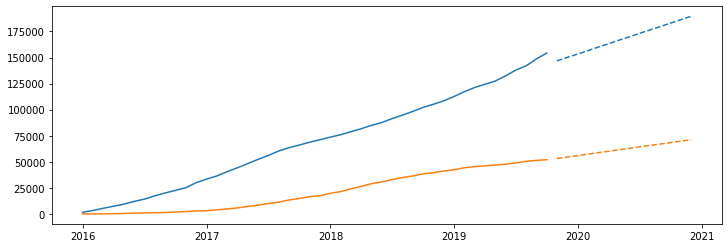

Government of Gujarat:

Learning Confidence = 0.9615482607008735



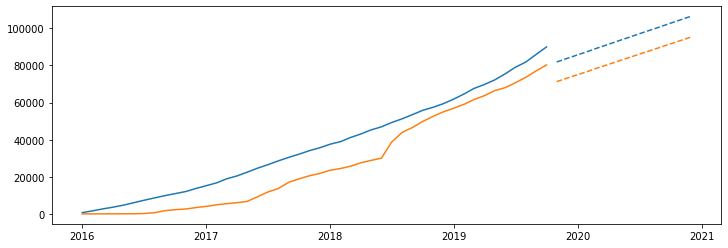

Government of Rajasthan:

Learning Confidence = -11.712240263542853



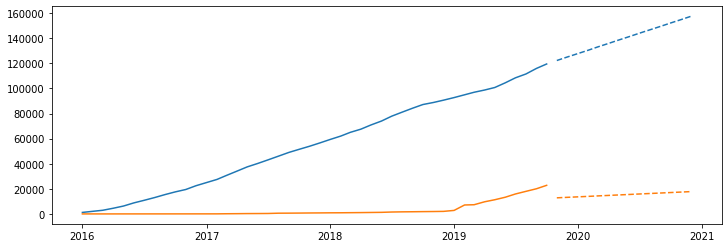

Government of Goa:

Learning Confidence = 0.9927811857651838



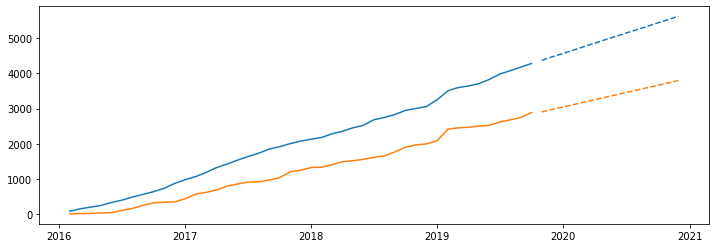

In [19]:
#takes the list of states and iterates through each of the state and prints the header, creates a linear regression model
# trains he model and uses the trained model to predict. Finally plots the data

state_list = ['Government of Maharashtra', 'Government of Gujarat', 'Government of Rajasthan','Government of Goa']
for state in state_list:
    dept_dataframe=group_data.get_group(state)
    dept_dataframe=preprocess_Dataframe(dept_dataframe)
    ret = create_model(dept_dataframe, 0.25)
    statewise_linearRegression=ret[0]
    testdata_input=ret[1]
    testdata_output=ret[2]
    preddata_output=statewise_linearRegression.predict(testdata_input)
    print_header(state, testdata_output, preddata_output)
    future_preddata_output=predict_tickets(46, 14, 1)
    future_daterange=pd.date_range('2019/10/01', periods = 14, freq = 'M')
    plot_graph(dept_dataframe, future_daterange,future_preddata_output)

Government of Arunachal Pradesh:

Learning Confidence = 0.9288749009680022



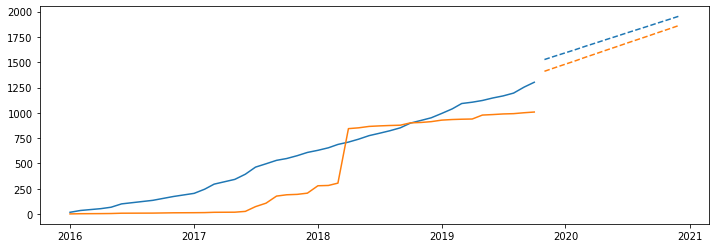

Government of Assam:

Learning Confidence = 0.9011632975537751



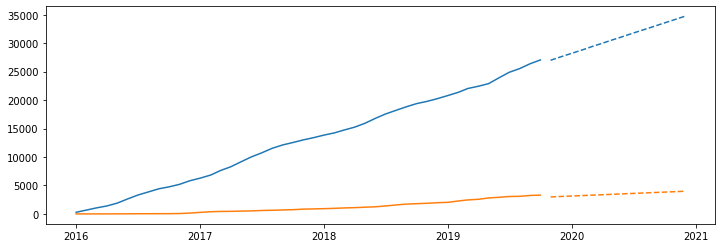

Government of Sikkim:

Learning Confidence = 0.8583121260827276



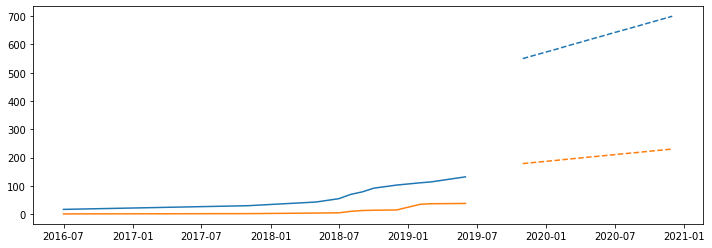

Government of Tripura:

Learning Confidence = 0.8805629696492664



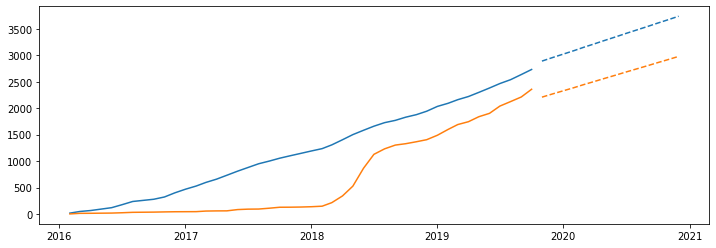

Government of Manipur:

Learning Confidence = 0.9383362590312728



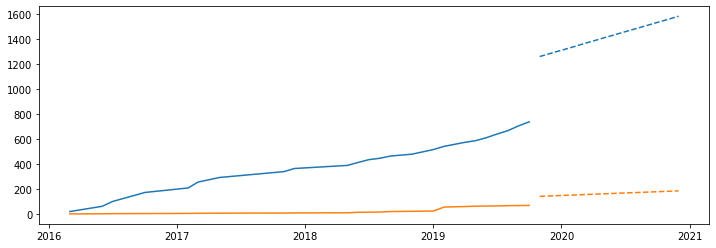

Government of Meghalaya:

Learning Confidence = 0.5692616406771438



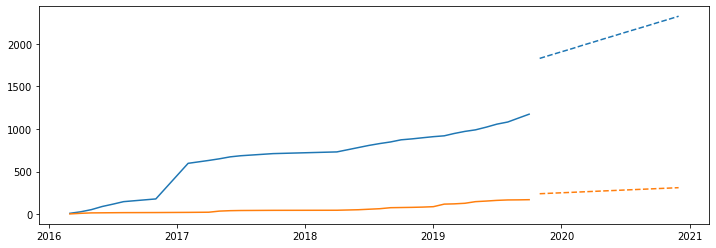

Government of Mizoram:

Learning Confidence = 0.8988880380284643



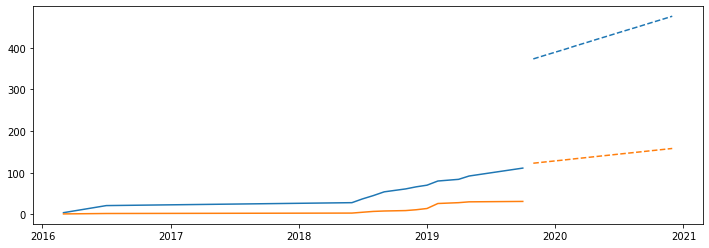

Government of Nagaland:

Learning Confidence = 0.9714046500732155



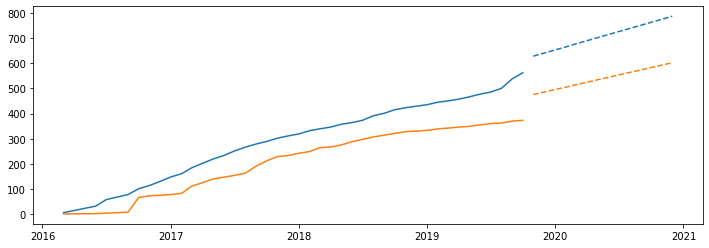

In [20]:
#takes the list of states and iterates through each of the state and prints the header, creates a linear regression model
# trains he model and uses the trained model to predict. Finally plots the data

state_list = ['Government of Arunachal Pradesh', 'Government of Assam', 'Government of Sikkim','Government of Tripura',
             'Government of Manipur','Government of Meghalaya','Government of Mizoram','Government of Nagaland']
for state in state_list:
    dept_dataframe=group_data.get_group(state)
    dept_dataframe=preprocess_Dataframe(dept_dataframe)
    ret = create_model(dept_dataframe, 0.25)
    statewise_linearRegression=ret[0]
    testdata_input=ret[1]
    testdata_output=ret[2]
    preddata_output=statewise_linearRegression.predict(testdata_input)
    print_header(state, testdata_output, preddata_output)
    future_preddata_output=predict_tickets(46, 14, 1)
    future_daterange=pd.date_range('2019/10/01', periods = 14, freq = 'M')
    plot_graph(dept_dataframe, future_daterange,future_preddata_output)

Government of Haryana:

Learning Confidence = 0.7365694536792105



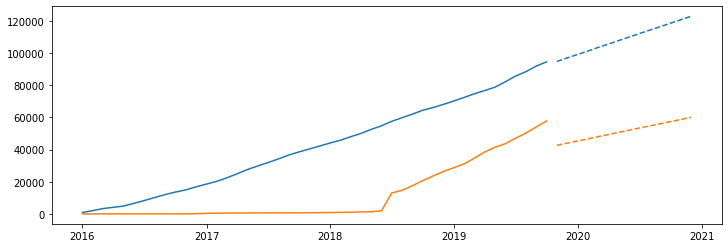

Government of Himachal Pradesh:

Learning Confidence = 0.8703379241603959



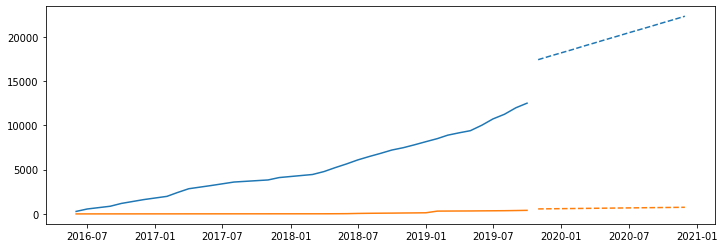

Government of Jammu and Kashmir:

Learning Confidence = 0.7393834743333173



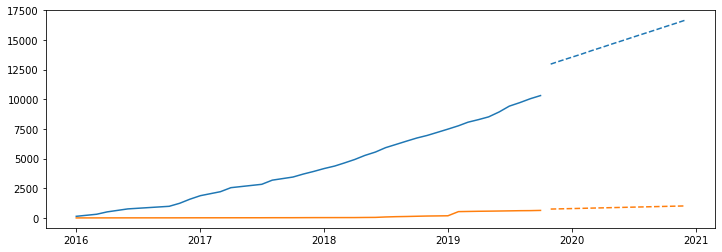

Government of Punjab:

Learning Confidence = 0.9877394611866979



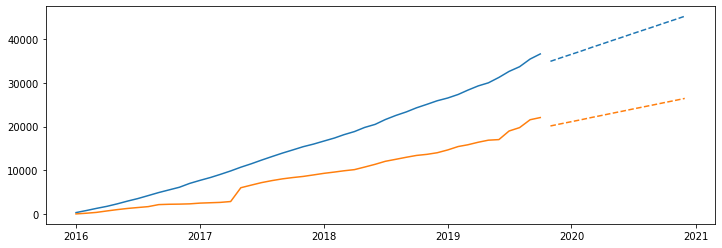

Government of Madhya Pradesh:

Learning Confidence = 0.9787469334557912



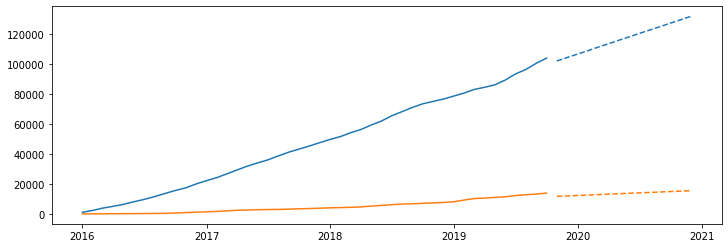

Government of Uttar Pradesh:

Learning Confidence = 0.9776788970630474



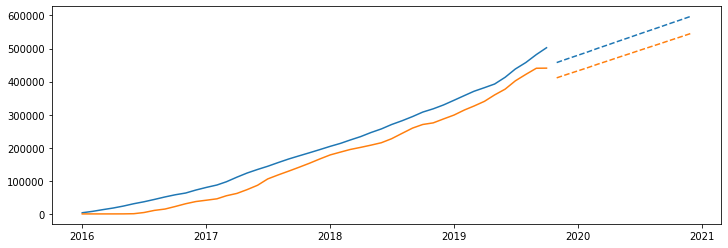

In [21]:
#takes the list of states and iterates through each of the state and prints the header, creates a linear regression model
# trains he model and uses the trained model to predict. Finally plots the data

state_list = ['Government of Haryana', 'Government of Himachal Pradesh', 'Government of Jammu and Kashmir',
             'Government of Punjab','Government of Madhya Pradesh','Government of Uttar Pradesh']
for state in state_list:
    dept_dataframe=group_data.get_group(state)
    dept_dataframe=preprocess_Dataframe(dept_dataframe)
    ret = create_model(dept_dataframe, 0.25)
    statewise_linearRegression=ret[0]
    testdata_input=ret[1]
    testdata_output=ret[2]
    preddata_output=statewise_linearRegression.predict(testdata_input)
    print_header(state, testdata_output, preddata_output)
    future_preddata_output=predict_tickets(46, 14, 1)
    future_daterange=pd.date_range('2019/10/01', periods = 14, freq = 'M')
    plot_graph(dept_dataframe, future_daterange,future_preddata_output)

Government of West Bengal:

Learning Confidence = 0.8019482214683264



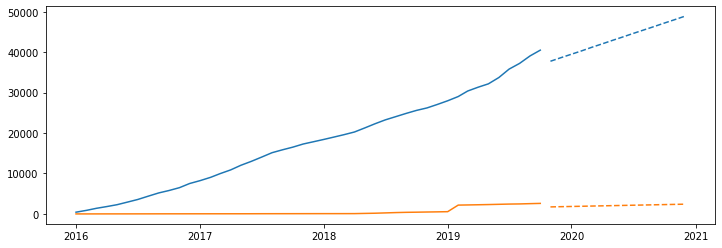

Government of Bihar:

Learning Confidence = 0.924885994443686



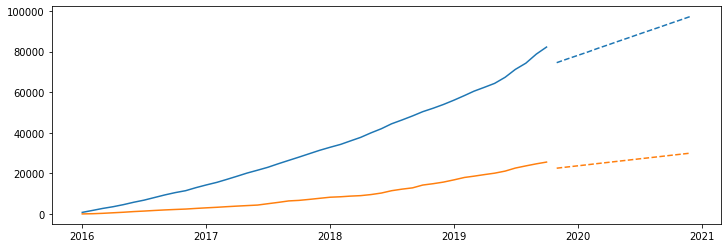

Government of Chattisgarh:

Learning Confidence = 0.9918271468332971



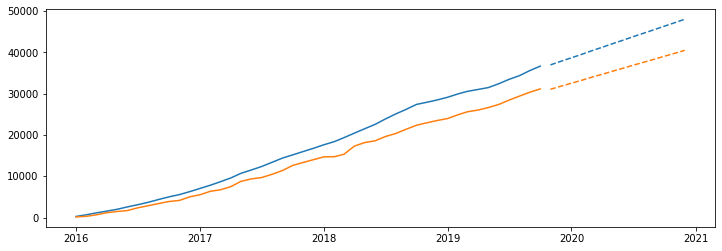

Government of Jharkhand:

Learning Confidence = 0.918856480655127



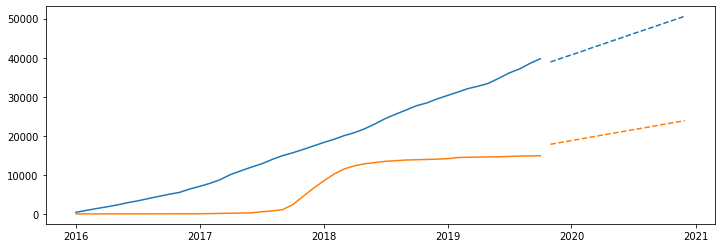

Government of Uttarakhand:

Learning Confidence = 0.9261833347070377



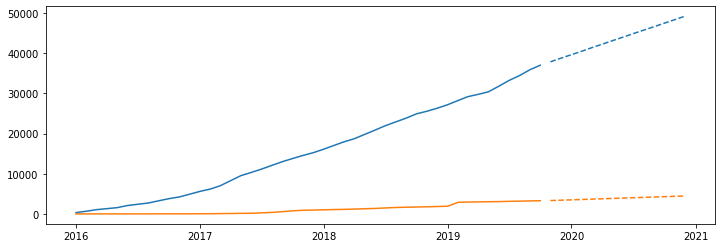

Government of Odisha:

Learning Confidence = 0.21115553578469887



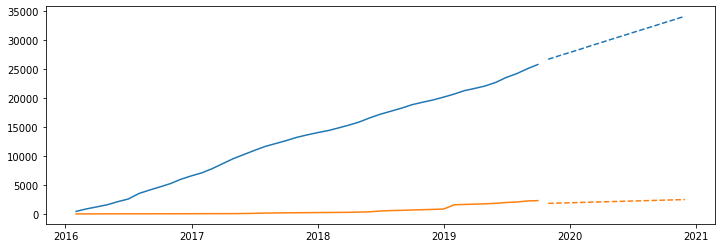

In [22]:
#takes the list of states and iterates through each of the state and prints the header, creates a linear regression model
# trains he model and uses the trained model to predict. Finally plots the data

state_list = ['Government of West Bengal', 'Government of Bihar', 'Government of Chattisgarh',
             'Government of Jharkhand','Government of Uttarakhand','Government of Odisha']
for state in state_list:
    dept_dataframe=group_data.get_group(state)
    dept_dataframe=preprocess_Dataframe(dept_dataframe)
    ret = create_model(dept_dataframe, 0.25)
    statewise_linearRegression=ret[0]
    testdata_input=ret[1]
    testdata_output=ret[2]
    preddata_output=statewise_linearRegression.predict(testdata_input)
    print_header(state, testdata_output, preddata_output)
    future_preddata_output=predict_tickets(46, 14, 1)
    future_daterange=pd.date_range('2019/10/01', periods = 14, freq = 'M')
    plot_graph(dept_dataframe, future_daterange,future_preddata_output)

Government of Puducherry:

Learning Confidence = 0.9942472294496659



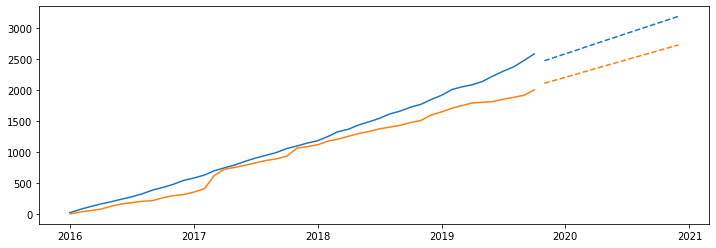

Government of NCT of Delhi:

Learning Confidence = 0.9757779682428099



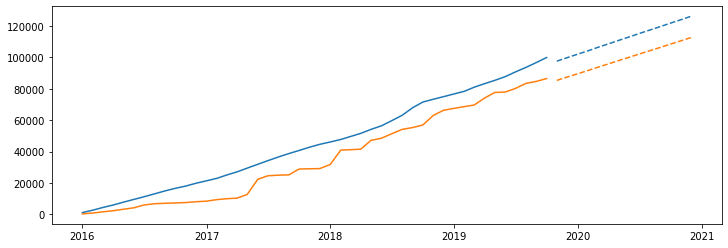

Government of Union Territory of Chandigarh:

Learning Confidence = 0.9847616265616144



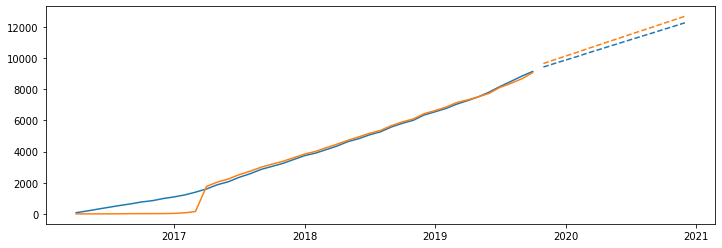

Government of Union Territory of Dadra & Nagar Haveli:

Learning Confidence = 0.8761815174270654



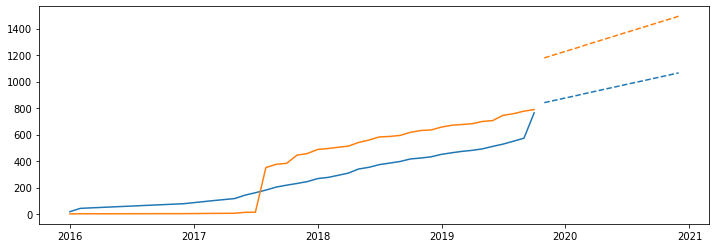

Government of Union Territory of Daman & Diu:

Learning Confidence = 0.9526863900941123



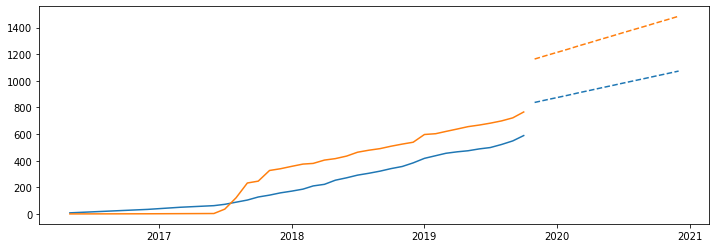

Government of Union Territory of Lakshadweep:

Learning Confidence = 0.9859447281120781



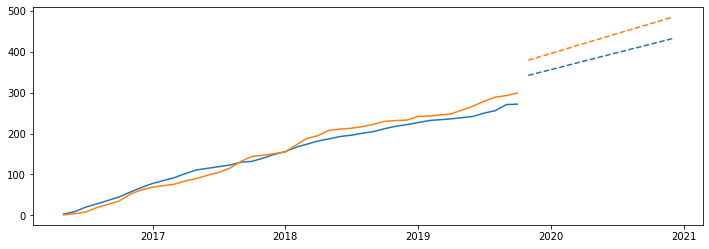

Government of Andaman & Nicobar:

Learning Confidence = 0.9811343551420535



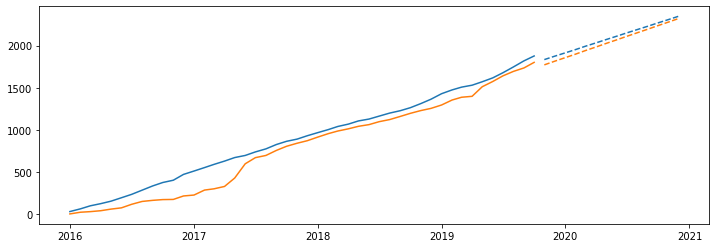

In [23]:
#takes the list of states and iterates through each of the state and prints the header, creates a linear regression model
# trains he model and uses the trained model to predict. Finally plots the data

state_list = ['Government of Puducherry', 'Government of NCT of Delhi', 'Government of Union Territory of Chandigarh',
             'Government of Union Territory of Dadra & Nagar Haveli','Government of Union Territory of Daman & Diu','Government of Union Territory of Lakshadweep',
             'Government of Andaman & Nicobar']
for state in state_list:
    dept_dataframe=group_data.get_group(state)
    dept_dataframe=preprocess_Dataframe(dept_dataframe)
    ret = create_model(dept_dataframe, 0.25)
    statewise_linearRegression=ret[0]
    testdata_input=ret[1]
    testdata_output=ret[2]
    preddata_output=statewise_linearRegression.predict(testdata_input)
    print_header(state, testdata_output, preddata_output)
    future_preddata_output=predict_tickets(46, 14, 1)
    future_daterange=pd.date_range('2019/10/01', periods = 14, freq = 'M')
    plot_graph(dept_dataframe, future_daterange,future_preddata_output)